Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
# imports
import pandas as pd
import sqlite3
from sqlite3 import Error
import seaborn as sns

In [2]:
bike_stations_df = pd.read_csv('bike_stations.csv', index_col = 0)
yelp_business_df = pd.read_csv('yelp_business.csv', index_col = 0)

In [3]:
Business_and_Bike_Stations_df = pd.merge(yelp_business_df, bike_stations_df, on = 'Station Name')
Business_and_Bike_Stations_df = Business_and_Bike_Stations_df.drop(columns=['Latitude', 'Longitude'])

In [4]:
Business_and_Bike_Stations_df['Number of Bikes'] = Business_and_Bike_Stations_df['Available Bikes'] + Business_and_Bike_Stations_df['Empty Slots']
Business_and_Bike_Stations_df

,Station Name,Station Latitude,Station Longitude,Business Category,Business Name,Rating,Number of Reviews,Address,Contact,Available Bikes,Empty Slots,Number of Bikes
0,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,Brasseries,Le Saint-Bock,4.0,208,1749 Rue Saint-Denis,+1 514-680-8052,5,10,15
1,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,Tapas Bars,L'Amère à Boire,4.0,68,2049 Rue Saint-Denis,+1 514-282-7448,5,10,15
2,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,Pizza,Pizzeria Dei Compari,4.0,91,1668 Rue Saint-Denis,+1 514-843-6411,5,10,15
3,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,Modern European,Bouillon Bilk,4.5,503,1595 Boulevard Saint-Laurent,+1 514-845-1595,5,10,15
4,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,Speakeasies,Le 4e Mur,4.5,99,2021 Rue Saint-Denis,+1 438-396-8947,5,10,15
...,...,...,...,...,...,...,...,...,...,...,...,...
3177,Ste-Catherine / Union,45.503738,-73.569485,Brasseries,Henri - Brasserie Francaise,4.0,44,1240 Phillips Square,+1 514-544-3674,14,20,34
3178,Ste-Catherine / Union,45.503738,-73.569485,Diners,Deville Dinerbar,4.0,609,1425 Rue Stanley,+1 514-281-6556,14,20,34
3179,Ste-Catherine / Union,45.503738,-73.569485,Asian Fusion,MajesThé,4.0,166,2077 Boulevard Robert-Bourassa,+1 514-840-5128,14,20,34
3180,Ste-Catherine / Union,45.503738,-73.569485,Delis,Reuben's Deli & Steakhouse,4.0,674,1116 Rue Sainte-Catherine Ouest,+1 514-866-1029,14,20,34


In [5]:
Business_and_Bike_Stations_df.to_csv('Business_and_Bike_Stations.csv')

In [6]:
grouped_business = Business_and_Bike_Stations_df.groupby('Station Name').agg({
    'Rating': 'mean',
    'Number of Reviews': 'mean',
    'Number of Bikes': 'max'
}).reset_index()

grouped_business = grouped_business.rename(columns={
    'Rating': 'Average Rating',
    'Number of Reviews': 'Average Reviews',
})
grouped_business_df = pd.DataFrame(grouped_business)
print(grouped_business_df)

                    Station Name  Average Rating  Average Reviews  \
0           15e avenue / Laurier           3.950            32.10   
1           6e Avenue / Bélanger           4.325            16.25   
2           6e avenue / Villeray           4.250            11.65   
3               Atwater / Greene           4.175           170.30   
4           Atwater / Sherbrooke           4.200           293.65   
..                           ...             ...              ...   
155        du Mont-Royal / Clark           4.200           420.85   
156   du Mont-Royal / de Brébeuf           4.150           414.95   
157  du Parc-Lafontaine / Rachel           4.325           391.15   
158  du Square Dorchester / Peel           4.150           253.30   
159   Émile-Duployé / Sherbrooke           4.275           376.35   

     Number of Bikes  
0                 23  
1                 19  
2                 15  
3                 25  
4                 23  
..               ...  
155       

In [7]:
grouped_business_df.to_csv('grouped_business.csv')

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [8]:
Business_and_Bike_Stations_df.shape

(3182, 12)

In [9]:
Business_and_Bike_Stations_df['Station Name'].describe()

count                                              3182
unique                                              160
top       Gare d'autocars de Montréal (Berri / Ontario)
freq                                                 20
Name: Station Name, dtype: object

In [10]:
Business_and_Bike_Stations_df['Rating'].describe()

count    3182.000000
mean        4.188875
std         0.420881
min         1.000000
25%         4.000000
50%         4.000000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [11]:
Business_and_Bike_Stations_df['Number of Bikes'].describe()

count    3182.000000
mean       24.169705
std        10.574036
min        11.000000
25%        18.000000
50%        21.000000
75%        27.000000
max        80.000000
Name: Number of Bikes, dtype: float64

C:\Users\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Number of Bikes', ylabel='Count'>

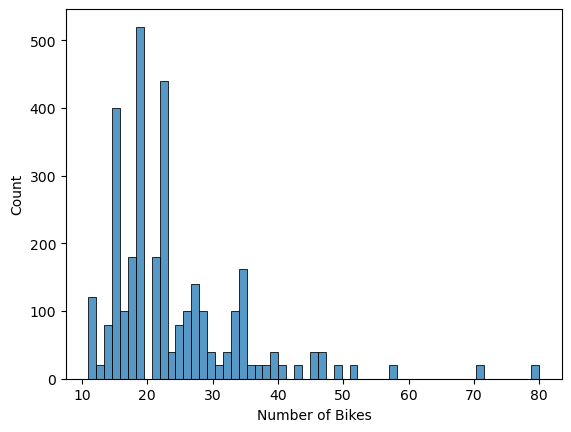

In [12]:
sns.histplot(Business_and_Bike_Stations_df['Number of Bikes'])

C:\Users\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rating', ylabel='Count'>

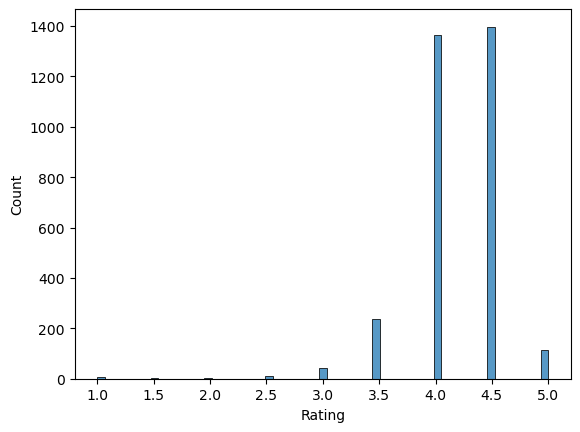

In [13]:
sns.histplot(Business_and_Bike_Stations_df['Rating'])

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [14]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [15]:
connection = create_connection("Business_and_Bike_Stations.sqlite")
connect = sqlite3.connect('Business_and_Bike_Stations.sqlite')

Connection to SQLite DB successful


In [16]:
table_name = 'Business_and_Bike_Stations'
Business_and_Bike_Stations_df.to_sql(table_name, connect, if_exists='replace', index=False)

3182

In [17]:
connect.commit()
connect.close()

Look at the data before and after the join to validate your data.

In [18]:
print(len(bike_stations_df.index))
print(bike_stations_df.shape[0])
print(bike_stations_df.shape[1])
print(bike_stations_df[bike_stations_df.columns[0]].count())

160
160
5
160


In [19]:
print(len(yelp_business_df.index))
print(yelp_business_df.shape[0])
print(yelp_business_df.shape[1])
print(yelp_business_df[yelp_business_df.columns[0]].count())

3182
3182
9
3182


In [20]:
print(len(Business_and_Bike_Stations_df.index))
print(Business_and_Bike_Stations_df.shape[0])
print(Business_and_Bike_Stations_df.shape[1])
print(Business_and_Bike_Stations_df[Business_and_Bike_Stations_df.columns[0]].count())

3182
3182
12
3182
